In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import uproot,glob


plt.rcParams["figure.figsize"] = (10, 8)

In [70]:
def get_df(filename,nevents=1e17):
    with open(filename, "r") as f:
        d={"Q2":[], "x":[], "pT1":[], "pT2":[], "y1":[], "y2":[], "z1":[], "z2":[], "phi1":[], "phi2":[],
          "p1":[], "p2":[], "thetalab1":[], "thetalab2":[],"philab1":[], "philab2":[],}
        d_lead={"Q2":[], "x":[], "pT1":[], "y1":[], "z1":[], "phi1":[],
          "p1":[],  "thetalab1":[],"philab1":[],}
        pT2s=[]
        phi2s=[]
        y2s=[]
        z2s=[]
        p2s=[]
        thetalab2s=[]
        philab22s=[]
        foundLeading=False
        events=0
        while True:
            line=f.readline()
            if line is not None:
                s=line.split()
            else : break
            if events>events:
                break
            if len(s)==0:
                break
            if s[0]=='#':
                nh2=len(pT2s)
                if foundLeading==True:
                    
                    d_lead['Q2'].append(Q2)
                    d_lead['x'].append(x)
                    d_lead['pT1'].append(pT1)
                    d_lead['y1'].append(y1)
                    d_lead['z1'].append(z1)
                    d_lead['p1'].append(p1)
                    d_lead['thetalab1'].append(thetalab1)
                    d_lead['philab1'].append(philab1)
                    d_lead['phi1'].append(phi1)
                    if nh2 >0:
                        d['Q2']+=[Q2]*nh2
                        d['x']+=[x]*nh2
                        d['pT1']+=[pT1]*nh2
                        d['y1']+=[y1]*nh2
                        d['z1']+=[z1]*nh2
                        d['p1']+=[p1]*nh2
                        d['thetalab1']+=[thetalab1]*nh2
                        d['philab1']+=[philab1]*nh2
                        d['phi1']+=[phi1]*nh2
                        d['pT2']+=pT2s
                        d['y2']+=y2s
                        d['z2']+=z2s
                        d['phi2']+=phi2s
                        d['p2']+=p2s
                        d['philab2']+=philab2s
                        d['thetalab2']+=thetalab2s
                    foundLeading=False

                Q2=float(s[1])
                x=float(s[2])
                
                #reset
                pT2s=[]
                phi2s=[]
                y2s=[]
                z2s=[]
                p2s=[]
                thetalab2s=[]
                philab2s=[]
                foundLeading=False
                events+=1
                
                    
            elif s[0]=="211" and float(s[1])>0.5: #leading pi+
                z1=float(s[1])
                pT1=float(s[2])
                phi1=float(s[3])
                y1=float(s[4])
                p1=float(s[5])
                thetalab1=np.pi-float(s[6])
                philab1=float(s[7])
                foundLeading=True
            elif s[0]=="-211" and float(s[1])<0.5: #subleading pi-
                z2s.append(float(s[1]))
                pT2s.append(float(s[2]))
                phi2s.append(float(s[3]))
                y2s.append(float(s[4]))
                p2s.append(float(s[5]))
                thetalab2s.append(np.pi-float(s[6]))
                philab2s.append(float(s[7]))
    return pd.DataFrame(d), pd.DataFrame(d_lead)
            
                

In [ ]:
events={}; events_lead={}
A='D'

for kT in np.linspace(0.4, 0.8, 9):
    #use the most recent version of the sim.
    cands=glob.glob(f"/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_kT/e{A}_{kT:.2f}/*.dat")
    import os
    cands=sorted(cands, key=os.path.getmtime)
    print(cands)
    events[('kT',kT)],  events_lead[('kT',kT)]= get_df(cands[-1],1000)
    print(f"parsed {('kT',kT)}, {len(events[('kT',kT)])} pairs, {len(events_lead[('kT',kT)])} leading")

In [159]:
for pT in np.linspace(0.3, 0.8, 11):
    #use the most recent version of the sim.
    cands=glob.glob(f"/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/e{A}_{pT:.2f}/*.dat")
    import os
    cands=sorted(cands, key=os.path.getmtime)
    print(cands)
    events[('pT',pT)],  events_lead[('pT',pT)]= get_df(cands[-1],1000)
    print(f"parsed {('pT',pT)}, {len(events[('pT',pT)])} pairs, {len(events_lead[('pT',pT)])} leading")

['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.30/1139654.dat', '/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.30/1147598.dat', '/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.30/1148818.dat', '/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.30/1150094.dat']
parsed ('pT', 0.3), 3615 pairs, 8321 leading
['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.35/1139659.dat', '/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.35/1147603.dat', '/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.35/1148823.dat', '/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.35/1150099.dat']
parsed ('pT', 0.35), 3734 pairs, 8342 leading
['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.40/1139664.dat', '/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.40/1147608.dat', '/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/eD_0.40/1148828

In [160]:
def process(df):
    pi=np.pi
    df['dphi']=df.eval(f"phi1-phi2-(phi1-phi2>{np.pi})*{2*pi}+(phi1-phi2<-{np.pi})*{2*np.pi}")
    df['dy']=df.eval("y1-y2")
    Mp=0.9383
    df['nu']=df.eval(f"Q2/(x*2*{Mp})")
    df['W']=df.eval(f"sqrt({Mp**2}+2*{Mp}*nu-Q2)")
def process_lead(df):
    Mp=0.9383
    df['nu']=df.eval(f"Q2/(x*2*{Mp})")
    df['W']=df.eval(f"sqrt({Mp**2}+2*{Mp}*nu-Q2)")

In [161]:
for key in events:
    process(events[key])
    process_lead(events_lead[key])

In [162]:
deg=np.pi/180
#all_data['all'][0]['D'].C
def getPrediction(q_add=None, q_add_lead=None):
    q=f"pT1>0.25 and pT2>0.25 and Q2>1 and nu>2.2 and nu<4.2 and thetalab1>10*{deg} and W>2"
    q+=f" and ((thetalab2>25*{deg} and p2>0.7) or (thetalab2>30*{deg} and p2>0.5) or (thetalab2>40*{deg} and p2>0.35))"
    q+=f" and z2>0.05 and z2<0.45 and z1>0.5"
    q_lead=f"pT1>0.25 and Q2>1 and nu>2.2 and nu<4.2 and W>2"
    if q_add is not None:
        q+= " and " + q_add
    if q_add_lead is not None:
        q_lead+= " and " + q_add_lead
        
    colors='tab:red tab:blue tab:orange tab:green'.split()
    results={}
    for i,key in enumerate(events.keys()):
        #plt.hist(events[A].query(q).dphi, bins=np.linspace(-np.pi,np.pi, 17), density=False, histtype='step', 
        #         label=A, color=colors[i])
        y,x=np.histogram(abs(events[key].query(q).dphi), bins=np.linspace(0,np.pi, 9))
        bc=(x[1:]+x[:-1])/2
        n_lead=len(events_lead[key].query(q_lead))
        
        C=y/n_lead
        dCstat = np.sqrt(y)/n_lead
        phi=bc
        phi_low=x[:-1]
        phi_up=x[1:]

        width=np.sum(y*(bc-np.pi)**2)/np.sum(y)
        dwidth=np.sqrt(sum(dCstat**2*(((phi-np.pi)**2-width**2)/sum(C))**2))/(2*width)
        print(key, width, dwidth)
        
        bc=list(bc)+list(reversed(np.pi*2-bc))
        y=np.array(list(y)+list(reversed(y)))

        
        plt.fill_between(bc, (y-np.sqrt(y))/n_lead,  (y+np.sqrt(y))/n_lead,label=f'{key[0]}={key[1]:.2f} GeV', alpha=0.5)
        results[key]=width, dwidth#pd.DataFrame({'C':C, 'dCstat':dCstat, "phi":phi,"phi_low":phi_low, "phi_up": phi_up})
        #results[kT]['R'] = results[kT]['C']/results['D']['C']
        #results[kT]['dRstat'] = results[kT]['R']*np.hypot(results[kT]['dCstat']/results[kT]['C'],results['D']['dCstat']/results['D']['C'])
    plt.legend()
    plt.show()
    return results
all_eHIJING={}

('kT', 0.4) 1.018126293400178 0.01659377634559926
('kT', 0.45) 0.979960520656124 0.01682539110282942
('kT', 0.5) 0.9780956822540885 0.016927959068557423
('kT', 0.55) 1.0554029057835708 0.016700756003885375
('kT', 0.6000000000000001) 1.0592085828752194 0.01626724718056867
('kT', 0.65) 0.9912926411838363 0.01691861902376496
('kT', 0.7000000000000001) 1.0061375904942904 0.016151564181966907
('kT', 0.75) 1.0118763317198745 0.016495656276168932
('kT', 0.8) 0.9902586759378899 0.016217111563745258
('pT', 0.3) 1.0469692440421898 0.04644961152641001
('pT', 0.35) 1.1988584055885405 0.04287140885621628
('pT', 0.4) 0.9124243652048756 0.046022940519402505
('pT', 0.45) 1.3184303372129653 0.04098338037654056
('pT', 0.5) 1.0627573724934813 0.04390708033625513
('pT', 0.55) 1.1353786312921075 0.044227764134776526
('pT', 0.6000000000000001) 1.0514946145580808 0.041608231845547454
('pT', 0.65) 1.2436369269897147 0.04339512839349674
('pT', 0.7) 1.1386837508761745 0.04123869509299295
('pT', 0.75) 1.12530321

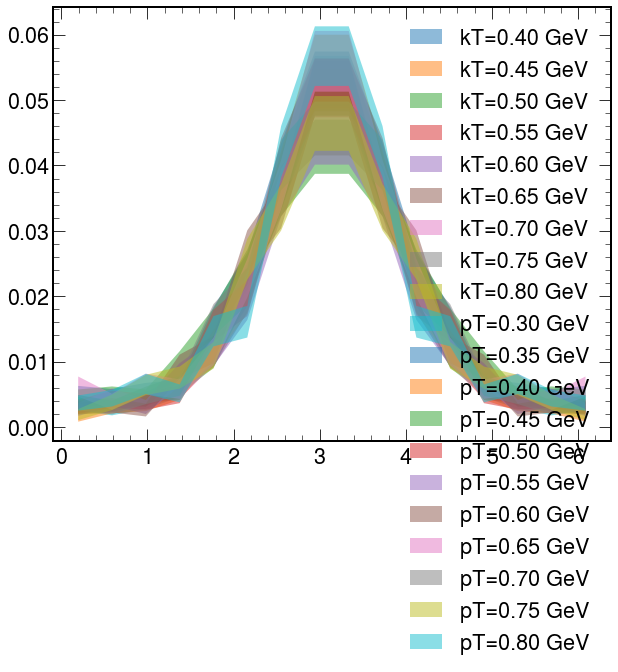

In [163]:
all_eHIJING['all']=[getPrediction()]

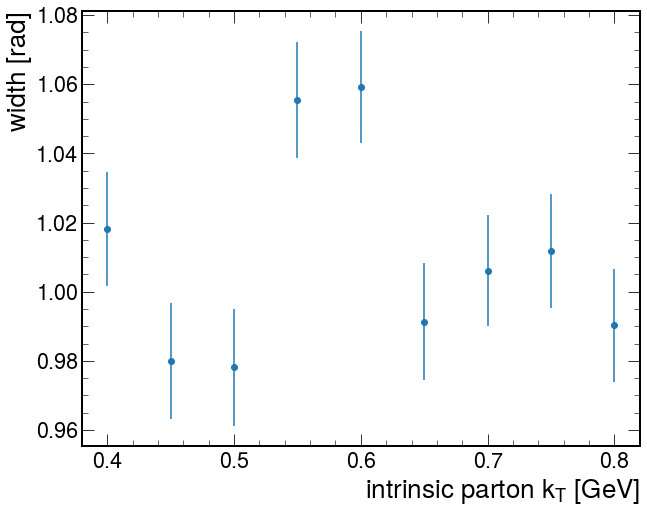

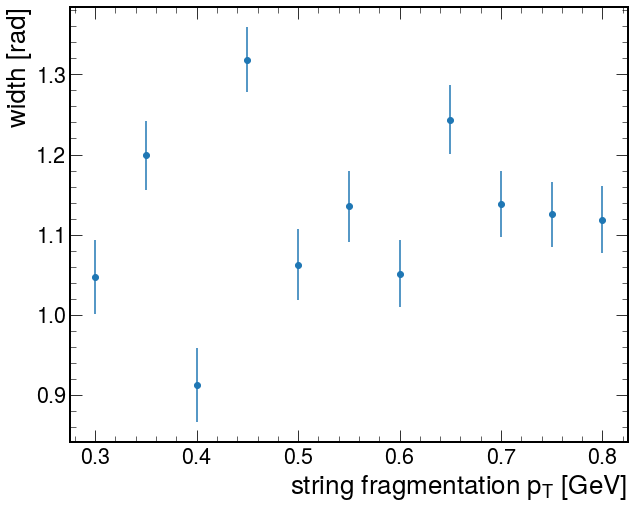

In [164]:
d=all_eHIJING['all'][0]
x,y,dy=[],[],[]
for key in d:
    if key[0] =='kT':
        x.append(key[1])
        y.append(d[key][0])
        dy.append(d[key][1])
plt.errorbar(x,y, dy, ls='', marker='o')
plt.xlabel("intrinsic parton $k_T$ [GeV]")
plt.ylabel("width [rad]")
plt.show()

x,y,dy=[],[],[]
for key in d:
    if key[0] =='pT':
        x.append(key[1])
        y.append(d[key][0])
        dy.append(d[key][1])
plt.errorbar(x,y, dy, ls='', marker='o')
plt.xlabel("string fragmentation $p_T$ [GeV]")
plt.ylabel("width [rad]")
plt.show()


dY bins
('kT', 0.4) 0.6679921983836786 0.08977518396032495
('kT', 0.45) 0.5833853648407237 0.07436692668829764
('kT', 0.5) 0.6663534221427055 0.06868302544687564
('kT', 0.55) 0.8807910177654866 0.07584500011155694
('kT', 0.6000000000000001) 0.5984916359291538 0.08463784128967719
('kT', 0.65) 0.6784828493202107 0.08137312376868777
('kT', 0.7000000000000001) 0.6596284191438682 0.07495877000746767
('kT', 0.75) 0.6151740514945303 0.0698589059737682
('kT', 0.8) 0.7691244176913866 0.06860307723340658
('pT', 0.3) 0.43333731823532956 0.2263689005200125
('pT', 0.35) 0.58138138425167 0.15380107855481098
('pT', 0.4) 0.6039992276708331 0.24346762018216972
('pT', 0.45) 0.8738712230131203 0.17181722682822634
('pT', 0.5) 0.6457651317119013 0.15910958271055226
('pT', 0.55) 0.5432488217929156 0.12859922732126422
('pT', 0.6000000000000001) 0.6113426833264055 0.21116366768330797
('pT', 0.65) 0.22998943445426445 0.17667626876758533
('pT', 0.7) 0.38951967800635534 0.16758301756520866
('pT', 0.75) 0.4944859

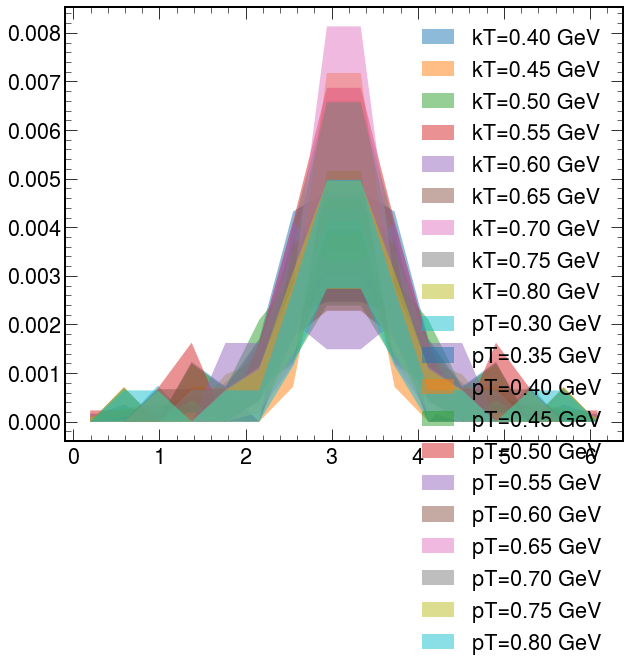

('kT', 0.4) 1.026002088638038 0.023322293189334636
('kT', 0.45) 0.9026715018449071 0.024354053586293778
('kT', 0.5) 0.9200169274833931 0.023480263641278296
('kT', 0.55) 0.9839023264571151 0.023485859290641436
('kT', 0.6000000000000001) 1.0029276281967148 0.0227915490520404
('kT', 0.65) 0.9557637278760313 0.0241181716890504
('kT', 0.7000000000000001) 0.9547389995015196 0.023049685871781293
('kT', 0.75) 0.9594903579498003 0.02318440915834018
('kT', 0.8) 0.9564656204760936 0.022874019798220818
('pT', 0.3) 0.8943481666680818 0.06647370364078373
('pT', 0.35) 1.0926817233636603 0.049743223558329476
('pT', 0.4) 0.8286076816878246 0.056134996768525805
('pT', 0.45) 0.8736287504207193 0.06319855042078396
('pT', 0.5) 0.771621585026291 0.06538389787619923
('pT', 0.55) 0.9694877316293696 0.05854558518279161
('pT', 0.6000000000000001) 0.9535477168760811 0.05954919306836083
('pT', 0.65) 0.9390305537861205 0.0651666014955747
('pT', 0.7) 0.9624266223505461 0.06008638332725
('pT', 0.75) 0.84320005655834

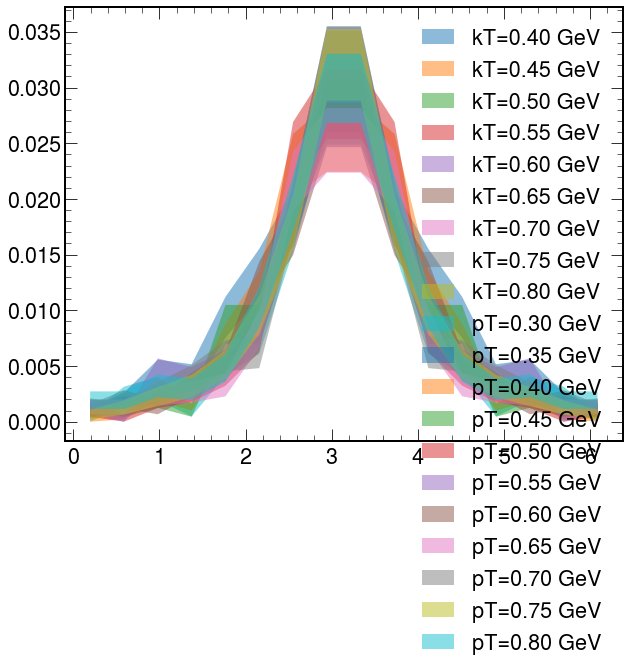

('kT', 0.4) 1.0555225146013005 0.024804063067355997
('kT', 0.45) 1.1463715773705918 0.02455944480539514
('kT', 0.5) 1.1089697959863731 0.02615851818067118
('kT', 0.55) 1.1693484155258036 0.02537523766092588
('kT', 0.6000000000000001) 1.2014956589251107 0.024578371108664458
('kT', 0.65) 1.0820206695423296 0.024939637340857253
('kT', 0.7000000000000001) 1.1208047896678397 0.024092263701060216
('kT', 0.75) 1.1594423357163746 0.025057557949125536
('kT', 0.8) 1.072022592750165 0.02492447271996116
('pT', 0.3) 0.9237082117000235 0.06507092855064255
('pT', 0.35) 1.2878984456811011 0.07328723411676566
('pT', 0.4) 0.8604154204442332 0.06114614471081224
('pT', 0.45) 1.0038837674606416 0.07288916141639752
('pT', 0.5) 0.931462953941545 0.07242429857175839
('pT', 0.55) 1.4374103788784125 0.06359859522558113
('pT', 0.6000000000000001) 1.2617986029199915 0.05707646699640567
('pT', 0.65) 1.0207012751902307 0.0692760722237858
('pT', 0.7) 1.2605413453329612 0.06448021708870746
('pT', 0.75) 1.032585751059

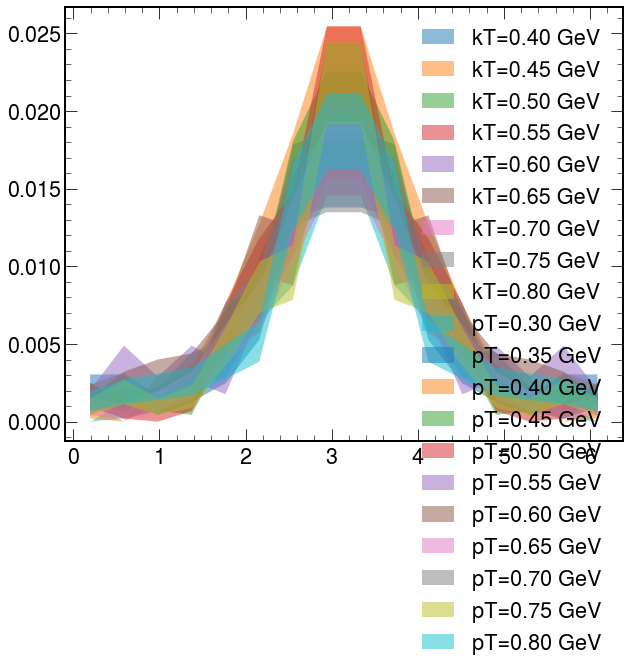

pT1 bins
('kT', 0.4) 1.35352967277681 0.022535463562402595
('kT', 0.45) 1.2594135634076464 0.02277265196685938
('kT', 0.5) 1.3106265111230866 0.02428976149544903
('kT', 0.55) 1.4092425196482399 0.023270734433417394
('kT', 0.6000000000000001) 1.4617111047638744 0.02250993261141923
('kT', 0.65) 1.328686552637596 0.02324796600069602
('kT', 0.7000000000000001) 1.4500646257105403 0.02269431549069988
('kT', 0.75) 1.466499505637756 0.023605914989337742
('kT', 0.8) 1.3304107111122707 0.022745776018648106
('pT', 0.3) 1.172537294478573 0.06186851269451182
('pT', 0.35) 1.7102173876262654 0.06616087868862765
('pT', 0.4) 1.0896108734530172 0.05254934567432145
('pT', 0.45) 1.1732530308972446 0.06626212877385265
('pT', 0.5) 1.0879508662405093 0.06860868561011312
('pT', 0.55) 1.6745473499810237 0.05881754677589791
('pT', 0.6000000000000001) 1.4025509429439107 0.05555133853454853
('pT', 0.65) 1.229479403180868 0.06823706282770245
('pT', 0.7) 1.482845049676438 0.05570730359496582
('pT', 0.75) 1.24088842

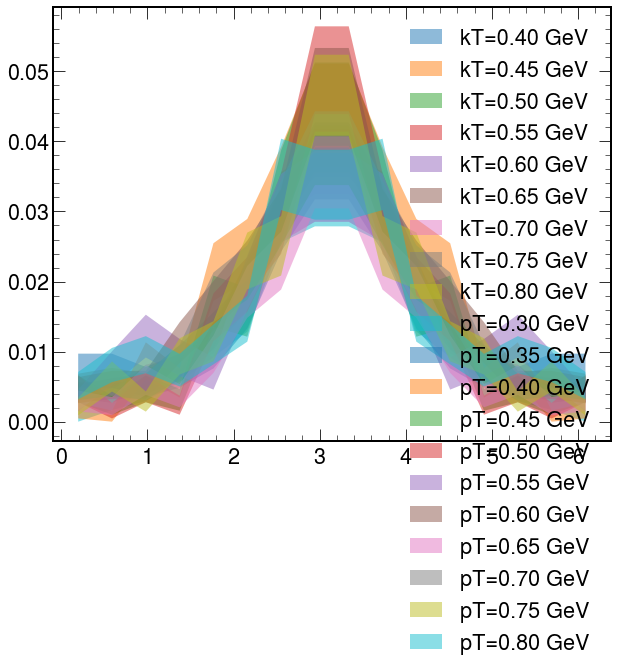

('kT', 0.4) 0.832166597808415 0.027241591861764548
('kT', 0.45) 0.8255301597900334 0.028706867384153133
('kT', 0.5) 0.825756087771167 0.026785768202901003
('kT', 0.55) 0.8766827453400654 0.027554971043862692
('kT', 0.6000000000000001) 0.852072377072844 0.027045303709309243
('kT', 0.65) 0.8221197078187821 0.02770657760805783
('kT', 0.7000000000000001) 0.7564968943664946 0.02658035768562291
('kT', 0.75) 0.8223279296637767 0.02645734046773214
('kT', 0.8) 0.8351876133350985 0.026606220369385574
('pT', 0.3) 0.7750907840640955 0.07952425040100757
('pT', 0.35) 0.8319117791016114 0.05557454487474767
('pT', 0.4) 0.597346920782844 0.0644890262433477
('pT', 0.45) 0.8797126081936891 0.06788728358822525
('pT', 0.5) 0.7381095993918738 0.06740972214471803
('pT', 0.55) 0.7421479871912895 0.07948580678283917
('pT', 0.6000000000000001) 0.7726410426382774 0.06189212226034996
('pT', 0.65) 0.8304086919280328 0.0701635746444909
('pT', 0.7) 0.8219529915282231 0.0831655290324246
('pT', 0.75) 0.718196559033238

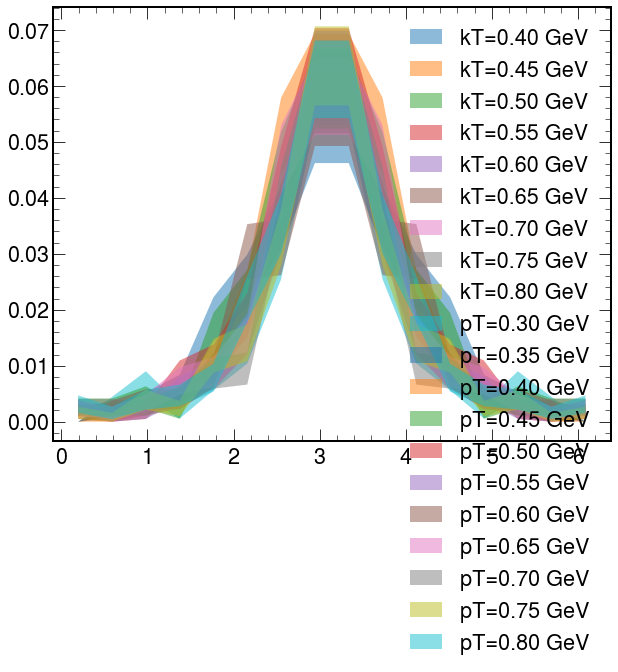

('kT', 0.4) 0.5155076652218528 0.055830921904715565
('kT', 0.45) 0.6265723717947014 0.050853861449105114
('kT', 0.5) 0.5762500633794222 0.04698467548404328
('kT', 0.55) 0.5754146549554506 0.04945891096082765
('kT', 0.6000000000000001) 0.5441572013458336 0.04918177681592
('kT', 0.65) 0.584782708198307 0.05470443210478704
('kT', 0.7000000000000001) 0.5812754872087398 0.04528565458130873
('kT', 0.75) 0.4925070339408896 0.04550857426511163
('kT', 0.8) 0.5851616675108864 0.046981547070720144
('pT', 0.3) 0.48554609513964303 0.11611327091614607
('pT', 0.35) 0.7074751937266265 0.09488538954745467
('pT', 0.4) 0.7451270936333799 0.13837160070990023
('pT', 0.45) 0.5862736450539342 0.15054764552777025
('pT', 0.5) 0.40572592497037724 0.10135315712876454
('pT', 0.55) 0.7746611371063367 0.10911032489080301
('pT', 0.6000000000000001) 0.8183449993532965 0.13003420541235297
('pT', 0.65) 0.47134325453791165 0.1317558366574288
('pT', 0.7) 0.4761834049089776 0.10323152958212482
('pT', 0.75) 0.4571301145593

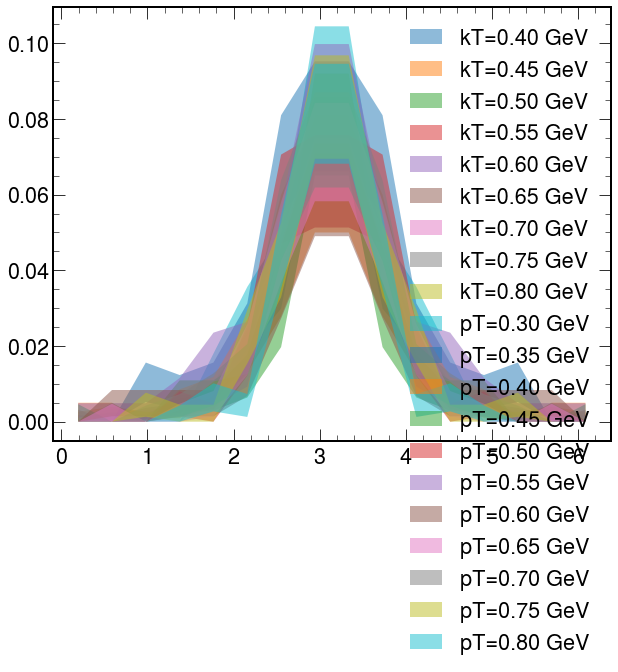

pT2 bins
('kT', 0.4) 1.3507579986040237 0.020522680050362316
('kT', 0.45) 1.2857265645992373 0.020667146566741745
('kT', 0.5) 1.3060809654768202 0.020999555329806557
('kT', 0.55) 1.407654665869748 0.020862523841099847
('kT', 0.6000000000000001) 1.4001060503783689 0.02042680852867525
('kT', 0.65) 1.344205239036772 0.020754301331507376
('kT', 0.7000000000000001) 1.30889211470613 0.020165755337111704
('kT', 0.75) 1.3352925750337856 0.020509295118850718
('kT', 0.8) 1.317868807648428 0.020105006851102624
('pT', 0.3) 0.9782110741607551 0.05396932472726045
('pT', 0.35) 1.4023477076858863 0.051423685710729666
('pT', 0.4) 1.0685496480031158 0.04858290393402336
('pT', 0.45) 1.1599698864975594 0.05527046987036605
('pT', 0.5) 1.0851025166397925 0.05805612024507019
('pT', 0.55) 1.582147520993082 0.052219375955124235
('pT', 0.6000000000000001) 1.3565064128250293 0.04911079881261924
('pT', 0.65) 1.2998738538981376 0.056110641532254986
('pT', 0.7) 1.3840224348287937 0.052313364749504834
('pT', 0.75) 1

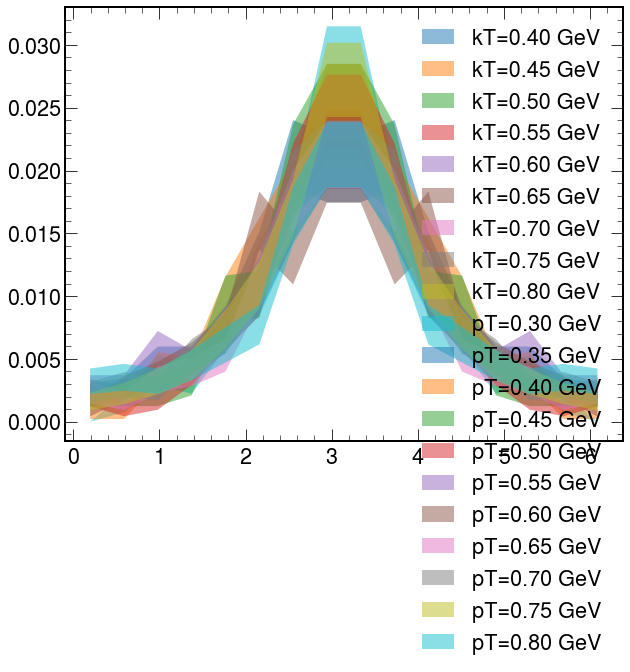

('kT', 0.4) 0.6551248037661329 0.028104941857695874
('kT', 0.45) 0.641689657875153 0.028533716690018994
('kT', 0.5) 0.6428419081921626 0.028827431973238005
('kT', 0.55) 0.6821884034085404 0.02834441616487634
('kT', 0.6000000000000001) 0.7219115539132716 0.027391429404362466
('kT', 0.65) 0.6199427731048567 0.02906360033565922
('kT', 0.7000000000000001) 0.697426018000391 0.02704071723515058
('kT', 0.75) 0.7058821631737587 0.02854701236779942
('kT', 0.8) 0.6566874519706397 0.027430784053226177
('pT', 0.3) 0.7986875362717182 0.08429435324266314
('pT', 0.35) 0.8936479845765557 0.07100084653536058
('pT', 0.4) 0.555072348423465 0.07129921701557589
('pT', 0.45) 0.7684287782195203 0.08056028909523301
('pT', 0.5) 0.5741516337159258 0.07626109116128418
('pT', 0.55) 0.6462784131907857 0.076214125952901
('pT', 0.6000000000000001) 0.8469516605704559 0.0703057006841846
('pT', 0.65) 0.49456822284024754 0.07388446817885701
('pT', 0.7) 0.721246985946883 0.07778669101918341
('pT', 0.75) 0.544979602587158

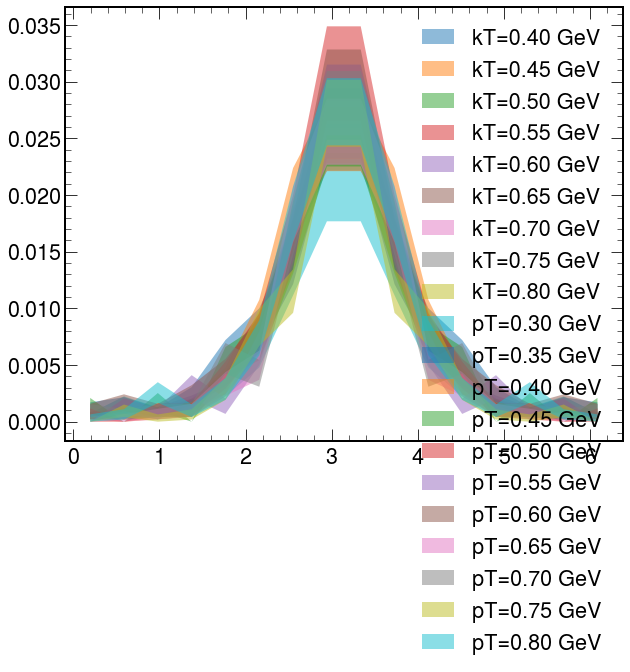

('kT', 0.4) 0.3117296925790501 0.09808824344731676
('kT', 0.45) 0.3033626037108827 0.12872873767433954
('kT', 0.5) 0.33565992605482375 0.07596658858673427
('kT', 0.55) 0.31435639017892786 0.07407706014077298
('kT', 0.6000000000000001) 0.2922111992290986 0.14728505324412317
('kT', 0.65) 0.27048884561735526 0.076112339720702
('kT', 0.7000000000000001) 0.2643644036006078 0.08373827406393447
('kT', 0.75) 0.3045139491957485 0.09366447207745983
('kT', 0.8) 0.2678249258453798 0.08012095376913618
('pT', 0.3) 0.20183703853330717 0.17333015116627534
('pT', 0.35) 0.2647315763833864 0.24223717307234727
('pT', 0.4) 0.6822229944367134 0.21288248544534186
('pT', 0.45) 0.1927657109587766 0.20406609305397427
('pT', 0.5) 0.38810163139700343 0.13145637426096293
('pT', 0.55) 0.2925503142786138 0.164444974022777
('pT', 0.6000000000000001) 0.3277017086299201 0.197522454876222
('pT', 0.65) 0.2758032479871727 0.21829679751386116
('pT', 0.7) 0.25059542424640957 0.25906487570717995
('pT', 0.75) 0.30674891396048

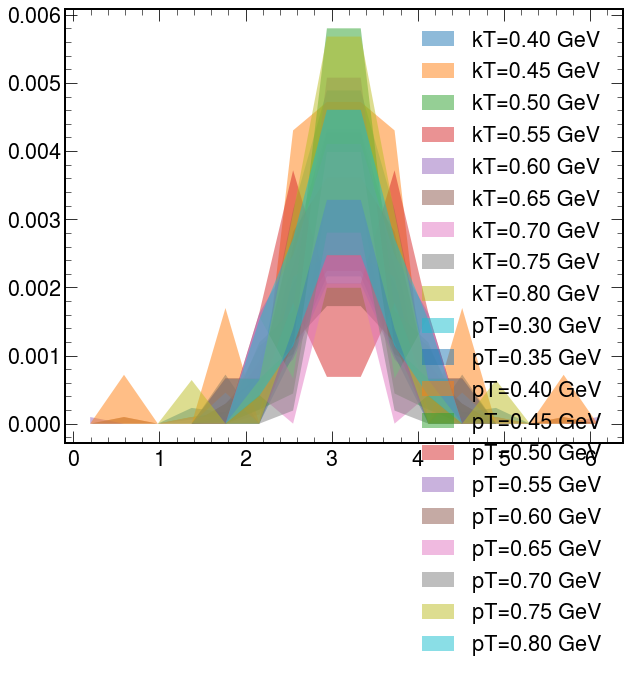

In [140]:
print("dY bins")
all_eHIJING['dY']=[getPrediction(f"{v1}<dy and dy<{v2}") for v1, v2 in [(-0.5, 0.5), (0.5, 1.5), (1.5, 2.5)]]
print("pT1 bins")
all_eHIJING['pT1']=[getPrediction(f"{v1}<pT1 and pT1<{v2}", f"{v1}<pT1 and pT1<{v2}") \
                    for v1, v2 in [(0.25, 0.4), (0.4, 0.6), (0.6, 1.0)]]
print("pT2 bins")
all_eHIJING['pT2']=[getPrediction(f"{v1}<pT2 and pT2<{v2}") for v1, v2 in [(0.25, 0.4), (0.4, 0.6), (0.6, 0.8)]]

In [258]:
# import pickle
# with open("eHIJING_results_tweak.pkl", "wb") as f:
#     pickle.dump(all_eHIJING, f, pickle.HIGHEST_PROTOCOL)

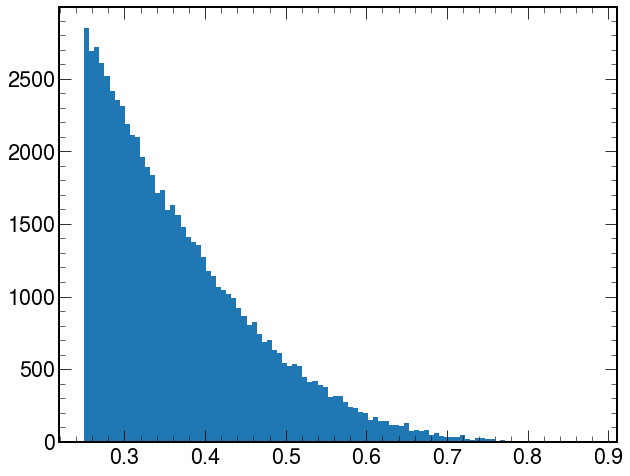

In [271]:
plt.hist(events['D'].query(q).eval(f"pT2"), bins=100)
plt.show()

In [ ]:
plt.hist(